
   ____   ______                                  __              
  / __ \ / ____/____   ____   ____   ___   _____ / /_ ____   _____
 / / / // /    / __ \ / __ \ / __ \ / _ \ / ___// __// __ \ / ___/
/ /_/ // /___ / /_/ // / / // / / //  __// /__ / /_ / /_/ // /    
\___\_\____/ \____//_/ /_//_/ /_/ \___/ \___/ \__/ \____//_/     
                                                                  
🧠 Qiskit Connector® for Quantum Backend Realtime Connection


⚛️ Connecting (Open Plan) to least-busy QPU...
----------------------------------------------------------------------------------
⚛️ Connected [Open Plan] → Realtime Least Busy QPU:: [ibm_torino]
- ibm_brisbane
- ibm_sherbrooke
- ibm_torino

🖥️ Least Busy QPU Now: [ibm_torino]
🖥️ Version: 2
🖥️ Qubits Count: 133
🖥️ Backend [ibm_torino] ready for use: ✔️ Yes
🖥️ Operational: Open Plan

⚛️ Getting (Open Plan) Least-busy QPU Processor Info...
----------------------------------------------------------------------------------

--- 🔳  Pro

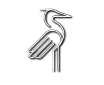

🟢 Heron Quantum Processor

🖥️ Your Plan: Open Plan
🖥️ Least Busy QPU: ibm_torino
🖥️ Backend Status: 🟢 Online

🧪 Ethylene (C₂H₄) Molecular Structure:
H       H
 \     /
  C == C
 /     \
H       H

🧮 Observable (Hamiltonian):
SparsePauliOp(['IIII', 'IZII', 'ZIIZ', 'ZZII', 'IIZZ', 'XXII', 'IIXX'],
              coeffs=[ 1. +0.j, -1.2+0.j, -1.2+0.j,  0.9+0.j,  0.9+0.j,  0.7+0.j,  0.7+0.j])

🔧 Transpiled Custom Ansatz Circuit:


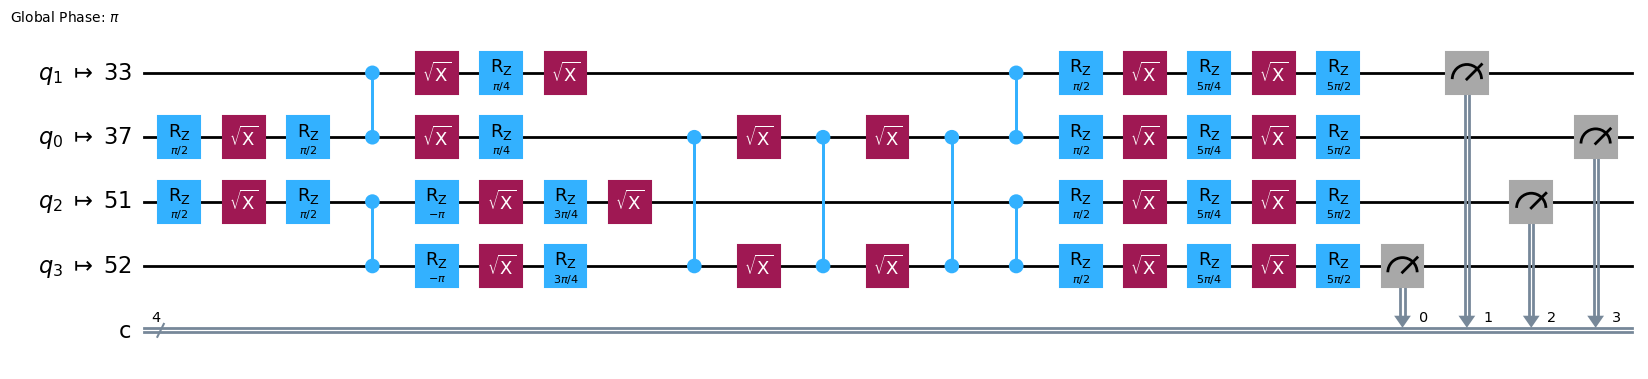


🔧 Ansatz Circuit 1

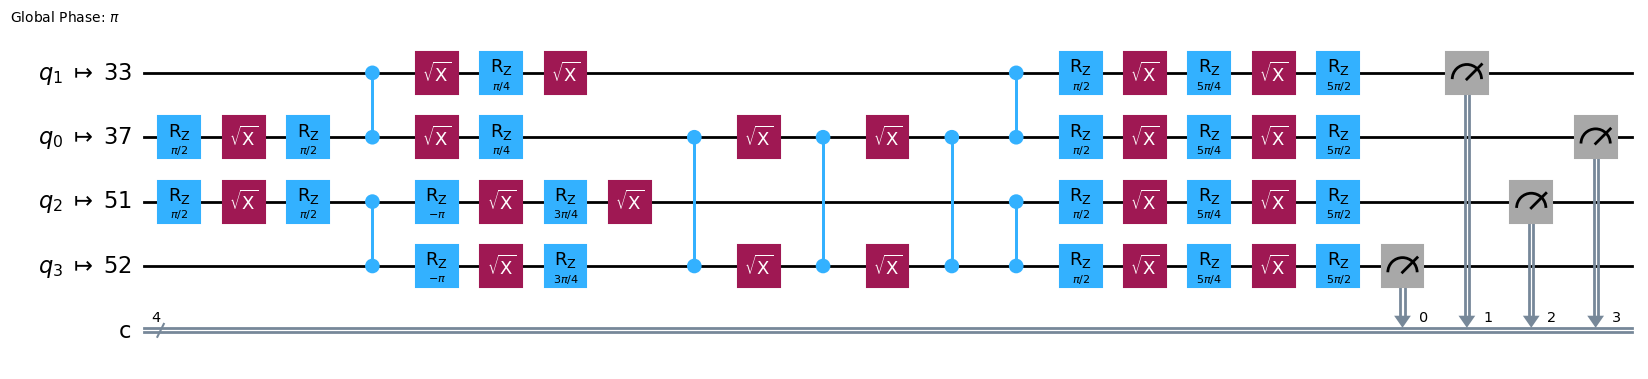

ok
Waiting for job to complete... ✅ Job completed!           
-- REAL BACKEND JOB INFORMATION --
Backend Job ID: d17ojp3mk80s73a2fvh0
Assigned Backend QPU: ibm_torino
Number of circuit pubs submitted to backend job: 1
Job Status: Completed
______________________________________________________________________________
✅ Job Result (Measurement Counts):
{'1111': 290, '0111': 78, '0101': 70, '1110': 88, '1101': 85, '1011': 89, '0011': 39, '0100': 31, '1001': 21, '0010': 21, '1010': 81, '0110': 30, '0000': 17, '1000': 25, '0001': 29, '1100': 30}



📊 **Histogram of Measurement Results**

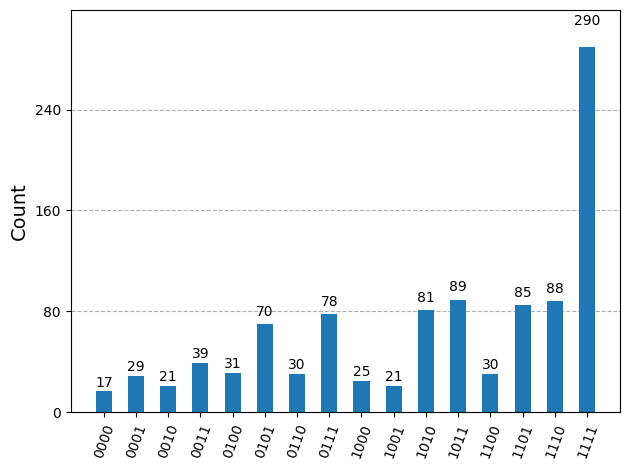

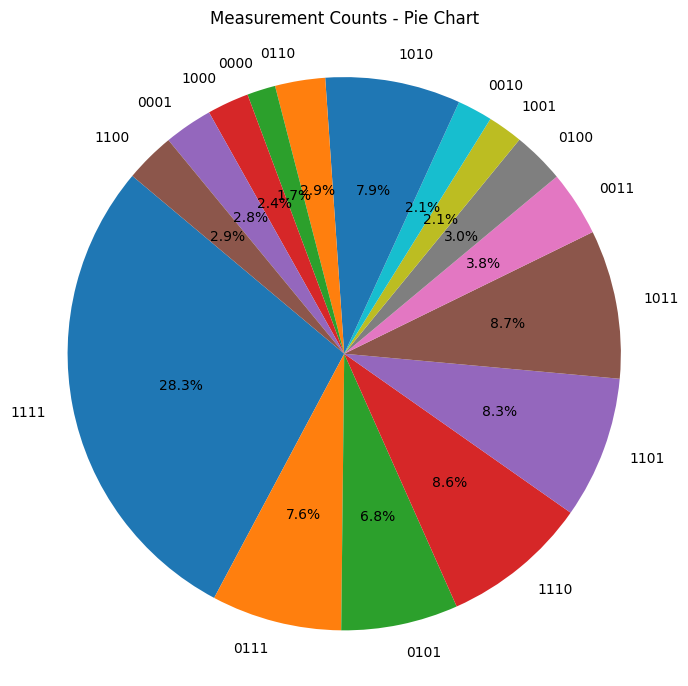

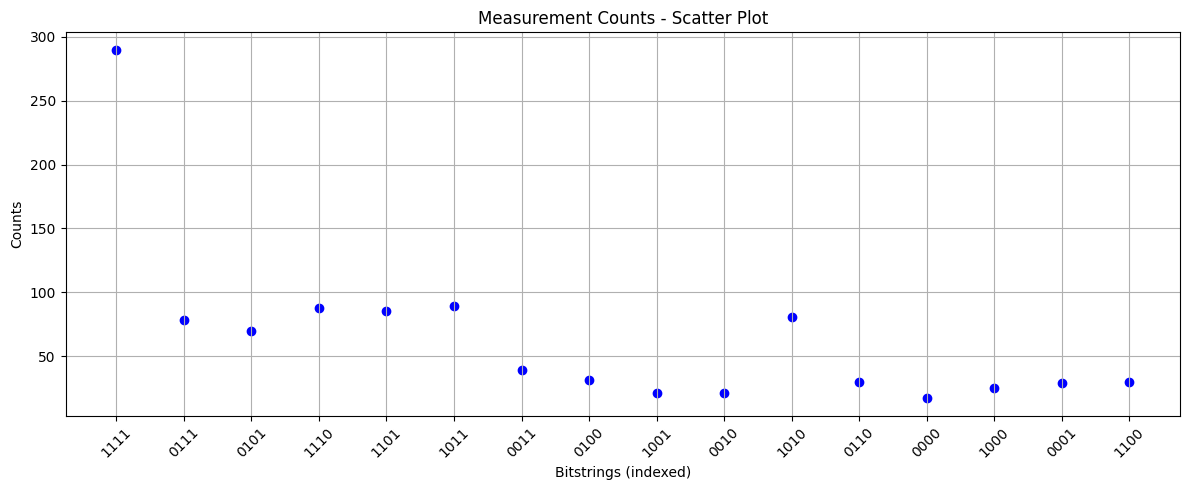


Design by: Dr. Jeffrey Chijioke-Uche, IBM Quantum Ambassador & Scientist
IBM Quantum Platform - June 15, 2025
----------------------------------------------------------------------------------



In [ ]:
# @Author: Dr. Jeffrey Chijioke-Uche
# @Purpose: VQE for Ethylene using Qiskit Nature
# @Date: 2025-17-04
# @Description: This script implements a Variational Quantum Eigensolver (VQE) for the Ethylene (C₂H₄) molecule using Qiskit.
# @Qiskit Version: v2.x
# ---------------------------------------------------------------------------------------------

# After Qiskit Connector® pip install, Import Qiskit Connector®:
from qiskit_connector import QConnectorV2 as connector
from qiskit_connector import QPlanV2 as plan

# Initialize Qiskit Connector®::
current = plan()
backend = connector()

#-------------------------------------------HOW TO USE QISKIT CONNECTOR---------------------------------------------



# ------------------------------ -------------QISKIT 2.x CODE SAMPLE ------------------------------------------------------------
#               This code sample is using the Qiskit Connector to run with a real quantum backend.
################################################################################################################################
# This quantum computing solution sample implements a Variational Quantum Eigensolver (VQE) algorithm to estimate the ground 
# state energy of the Ethylene molecule (C₂H₄) using IBM Quantum backends via the Qiskit Connector. It constructs a custom 
# parameterized quantum circuit (ansatz) tailored for Ethylene’s π-bonded electron structure, incorporating superposition and 
# entanglement to capture electron correlation effects. The ansatz parameters are initialized and bound to the circuit, which 
# is then transpiled and executed on a real quantum processing unit (QPU) using the SamplerV2 runtime primitive. The code robustly 
# supports both “Open Plan” and “Paid Plan” IBM quantum real backend access using Qiskit Connector.

# Measurement results are aggregated from the quantum job and visualized in multiple formats, including histograms, pie charts,
# and scatter plots, with display adapted for Jupyter notebooks or terminal environments. The solution provides clear real-time
# job status updates and error handling, making it production-ready for quantum chemistry simulations on IBM’s quantum hardware.

# [Use Case]
# The primary use case for this code is to perform quantum simulations of molecular electronic structures, specifically estimating
# the ground state energy of Ethylene (C₂H₄). Such calculations are critical for understanding molecular properties, reaction
# dynamics, and designing novel chemical compounds. Leveraging VQE on IBM’s quantum computers enables exploring molecular problems
# beyond classical computational reach by exploiting quantum superposition and entanglement, thereby advancing quantum
# computational chemistry research and practical applications.
##################################################################################################################################

import time
import numpy as np
from datetime import datetime
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import SamplerV2 as Sampler, Session
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from collections import Counter
import sys

shots = 1024  # The more shots, the more accurate the results, but also more time-consuming (Be careful)

def in_jupyter():
    try:
        from IPython import get_ipython
        shell = get_ipython().__class__.__name__
        return shell in ('ZMQInteractiveShell', 'Shell')
    except Exception:
        return False

def console_histogram(count_data, max_width=50):
    max_count = max(count_data.values())
    scale = max_width / max_count if max_count > 0 else 1
    print()
    for bitstring, count in sorted(count_data.items()):
        bar = '█' * int(count * scale)
        print(f"{bitstring:>5} | {bar} {count}")

def plot_pie_chart(counts):
    labels = list(counts.keys())
    sizes = list(counts.values())
    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Measurement Counts - Pie Chart")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def plot_scatter_plot(counts):
    bitstrings = list(counts.keys())
    frequencies = list(counts.values())
    indices = range(len(bitstrings))
    plt.figure(figsize=(12,5))
    plt.scatter(indices, frequencies, color='blue')
    plt.title("Measurement Counts - Scatter Plot")
    plt.xlabel("Bitstrings (indexed)")
    plt.ylabel("Counts")
    plt.xticks(indices, bitstrings, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def ethylene_molecular_structure():
    print("\n🧪 Ethylene (C₂H₄) Molecular Structure:")
    print("H       H")
    print(" \\     /")
    print("  C == C")
    print(" /     \\")
    print("H       H\n")

def ethylene_ansatz():
    num_qubits = 4
    num_clbits = 4
    qc = QuantumCircuit(num_qubits, num_clbits)
    params = ParameterVector("θ", length=2 * num_qubits)

    for i in range(num_qubits):
        qc.h(i)

    qc.cx(0, 1)
    qc.cx(2, 3)

    for i in range(num_qubits):
        qc.ry(params[i], i)

    qc.cz(0, 2)
    qc.cz(1, 3)

    for i in range(num_qubits):
        qc.rx(params[num_qubits + i], i)

    # Add measurement for Sampler counts output
    qc.measure(range(num_qubits), range(num_clbits))

    return qc, list(params)

def platform(circuit_list):
    for i, circ in enumerate(circuit_list):
        render = f"\n🔧 Ansatz Circuit {i+1}"
        if in_jupyter():
            display(Markdown(render))
            display(circ.draw(output="mpl"))
        else:
            print(render)
            print(circ.draw(output="text"))

def job_inprogress(job):
    spinner = ['|', '/', '-', '\\']
    idx = 0
    print("Waiting for job to complete... ", end='', flush=True)
    while not job.done():
        print(spinner[idx % len(spinner)], end='\b', flush=True)
        time.sleep(0.1)
        idx += 1
    print("✅ Job completed!           ")

def vqe_c2h4():

    ethylene_molecular_structure()

    hamiltonian = SparsePauliOp.from_list([
        ("IIII", 1.0),
        ("IZII", -1.2),
        ("ZIIZ", -1.2),
        ("ZZII", 0.9),
        ("IIZZ", 0.9),
        ("XXII", 0.7),
        ("IIXX", 0.7)
    ])

    print("🧮 Observable (Hamiltonian):")
    print(hamiltonian)

    ansatz, params = ethylene_ansatz()
    initial_param_values = [np.pi / 4] * len(params)

    # Bind parameters with initial values using assign_parameters()
    bound_circuit = ansatz.assign_parameters(initial_param_values)

    # Transpile the bound circuit for the REAL backend
    isa_circuit = transpile(bound_circuit, backend=backend, optimization_level=1)

    print("\n🔧 Transpiled Custom Ansatz Circuit:")
    if in_jupyter():
        display(isa_circuit.draw(output="mpl"))
    else:
        print(isa_circuit.draw(output="text"))

    ##################################################################################
    # Single job execution with SamplerV2 and Qiskit Connector preferred block
    ##################################################################################
    try:
        try:
            job_input = [isa_circuit]

            if current == "Open Plan":
                sampler = Sampler(mode=backend)
                job = sampler.run(job_input, shots=shots)
                platform([isa_circuit])
                print("ok")
                job_inprogress(job)
            elif current == "Paid Plan":
                with Session(backend=backend.name) as session:
                    sampler = Sampler(mode=session)
                    job = sampler.run(job_input, shots=shots)
                    platform([isa_circuit])
                    print("ok")
                    job_inprogress(job)
            else:
                raise ValueError(f"Qiskit connector alert raised: {current}")
        except Exception as e:
            print(f"⛔ Error during job submission to QPU backend: {e}")
            sys.exit(0)
    except KeyboardInterrupt:
        print("\n⛔ Job interrupted with keyboard while waiting!")
        print("⛔ You pressed Ctrl+C or Command+C, exiting gracefully.")
        sys.exit(0)

    # --- Job info and queue time ---
    def job_sent():
        elapsed = 0
        try:
            print(f"-- REAL BACKEND JOB INFORMATION --")
            print(f"Backend Job ID: {job.job_id()}")
            print(f"Assigned Backend QPU: {backend.name}")
            print(f"Number of circuit pubs submitted to backend job: {len(job_input)}")
            # completion_status = job.status().name.capitalize()
            completion_status = job.status().capitalize()

            job_status = "Completed" if completion_status == "Done" else "Pending"
            print(f"Job Status: {job_status}")
            while not job.done():
                print(f"\r⏳ Job queue time... {elapsed} sec", end="", flush=True)
                time.sleep(1)
                elapsed += 1
        except KeyboardInterrupt:
            print("\n⛔ Job interrupted with keyboard while waiting!")
            print("⛔ You pressed Ctrl+C or Command+C, exiting gracefully.")
            return
        print("\r", end="", flush=True)

    job_sent()

    # --- Retrieve and aggregate real counts ---
    results = job.result()
    counts_total = Counter()
    for res in results:
        counts = res.data.c.get_counts()
        counts_total.update(counts)

    print("______________________________________________________________________________")
    print(f"✅ Job Result (Measurement Counts):")
    print(dict(counts_total))

    # Visualization for Jupyter / Terminal
    if in_jupyter():
        display(Markdown("\n📊 **Histogram of Measurement Results**"))
        display(plot_histogram(counts_total))
        plot_pie_chart(counts_total)
        plot_scatter_plot(counts_total)
    else:
        print("\n📊 Histogram of Measurement Results")
        console_histogram(counts_total)
        print("\n📊 Pie Chart and Scatter Plot require a GUI environment to display - Try Jupyter.")

    print(f"\nDesign by: Dr. Jeffrey Chijioke-Uche, IBM Quantum Ambassador & Scientist")
    print(f"IBM Quantum Platform - {datetime.today().strftime('%B %d, %Y')}")
    print('-' * 82 + '\n')

if __name__ == "__main__":
    vqe_c2h4()
